## Check the SDSS flux spectra data 

In [1]:
import numpy as np
import os
from astropy.io import fits
from astropy.table import Table, Column
from loadspec import rdspec
# I have modified the part of "BOSS spec" in "rdspec"
import matplotlib.pyplot as plt

In [2]:
params = {
    'axes.labelsize': 10,
    'legend.fontsize': 10,
    'xtick.labelsize': 9,
    'ytick.labelsize': 9,
    'text.usetex': False,
    'figure.figsize': [4.5, 4.5],
    #----------
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'image.cmap': 'jet',
    'legend.frameon':  False,
    'xtick.top': True,
    'ytick.right': True,
    #----------
    'lines.linewidth': 2.0,
#    'axes.labelsize': 12,
    'xtick.minor.visible': True,
    'ytick.minor.visible': True,
    'xtick.minor.top': True, 
    'xtick.minor.bottom': True, 
    'ytick.minor.left': True, 
    'ytick.minor.right': True,
   }
plt.rcParams.update(params)

In [3]:
def show_spec(spec):
    fig, axis = plt.subplots(figsize=[18,9],nrows=1, ncols=1)
    axis.plot(spec.wave, spec.flux, 'k-', lw=0.8)
    return (fig, axis)

setting files path

In [4]:
Dir = '/nfs/P100/SDSSV_Classifiers/data/optical'

In [5]:
op_cv = os.path.join(Dir,'cv/SDSSJ000844.32-014014.6_56975-7863-0619.fits')
op_fgkm = os.path.join(Dir,'fgkm/spec-3587-55182-0516.fits')
op_hotstars = os.path.join(Dir,'hotstars/mastar-3-100637315.fits')
op_wd = os.path.join(Dir,'wd/SDSSJ000127.48+003759.1_55477-4216-0806.fits')
op_wdsb2 = os.path.join(Dir,'wdsb2/SDSSJ011009.12+132616.0_56186-4664-0700.fits')
op_yso = os.path.join(Dir,'yso/spec-1249-54484-0606.fits')

### op_CV: modify and check the "rdspec" class for *BOSS spec*

In [6]:
head = fits.getheader(op_cv,0)
tab  = Table.read(op_cv, 1)
cat  = Table.read(op_cv,2)
spec = rdspec(op_cv)
print tab['flux'].data, tab['flux'].data.shape
print spec.flux, spec.flux.shape
print np.allclose(tab['flux'].data, spec.flux)
print spec
print "sptype:",spec.sptype

[131.39305  115.94307  137.20778  ...  16.00064    4.24772   -7.505861] (4593,)
[131.39305  115.94307  137.20778  ...  16.00064    4.24772   -7.505861] (4593,)
True
<class loadspec.Spec1D at 0x7fc1dc5b5530>
BOSS spec Optical spectrum
File = /nfs/P100/SDSSV_Classifiers/data/optical/cv/SDSSJ000844.32-014014.6_56975-7863-0619.fits
S/N =   38.61
Flux = [131.39305  115.94307  137.20778  ...  16.00064    4.24772   -7.505861]
Err = [8.37501   8.296031  8.377119  ... 6.3756638       nan 3.0337877]
Wave = [ 3609.9392  3610.7717  3611.6023 ... 10387.236  10389.631  10392.016 ]
sptype: spec


**show spectrum**

33.79542


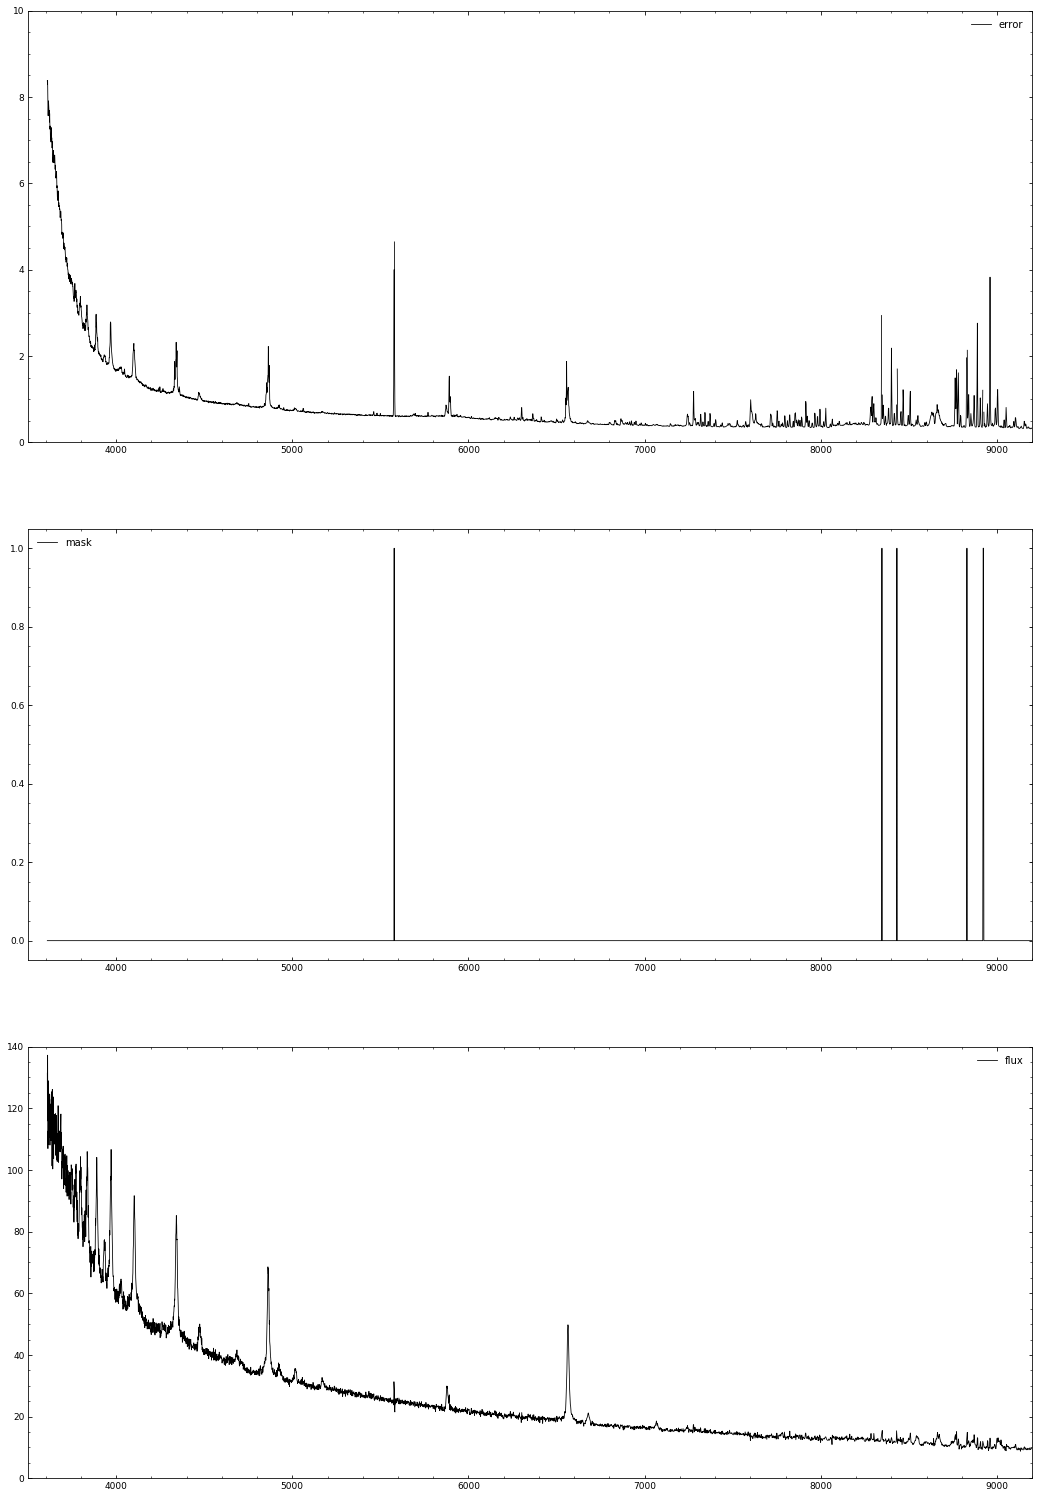

In [14]:
print np.mean(spec.ivar**0.5*spec.flux)
fig, ax = plt.subplots(figsize=[18,27],nrows=3, ncols=1)
ax[-1].plot(spec.wave, spec.flux, 'k-', lw=0.8, label='flux')
ax[-1].set_xlim(3500,9200)
ax[-1].set_ylim(0,140)
ax[1].plot(spec.wave, (spec.ivar**0.5*spec.flux)<1, 'k-', lw=0.8, label='mask')
ax[1].set_xlim(3500,9200)
#ax[1].set_ylim(0,140)
ax[0].plot(spec.wave, spec.err, 'k-', lw=0.8, label='error')
ax[0].set_xlim(3500,9200)
ax[0].set_ylim(0,10)
for i in ax:
    i.legend()

How to identify the masked region? such as at wave length is 5600
![](check/cv/SDSSJ000844.32-014014.6_56975-7863-0619.gif)

### op_fgkm: modify and check rdspec for *BOSS spec*

In [16]:
head = fits.getheader(op_fgkm,0)
tab  = Table.read(op_fgkm, 1)
cat  = Table.read(op_fgkm,2)
spec = rdspec(op_fgkm)
print tab['flux'].data, tab['flux'].data.shape
print spec.flux, spec.flux.shape
print np.allclose(tab['flux'].data, spec.flux)
print spec
print "sptype:",spec.sptype

[74.089775 84.527016 86.4678   ... 41.780254 38.49707  36.979626] (4609,)
[74.089775 84.527016 86.4678   ... 41.780254 38.49707  36.979626] (4609,)
True
<class loadspec.Spec1D at 0x7fc1dc5b5530>
BOSS spec Optical spectrum
File = /nfs/P100/SDSSV_Classifiers/data/optical/fgkm/spec-3587-55182-0516.fits
S/N =   55.95
Flux = [74.089775 84.527016 86.4678   ... 41.780254 38.49707  36.979626]
Err = [7.355714  7.5596056 7.428863  ... 4.636398  4.91332   4.9130316]
Wave = [ 3579.3164  3580.14    3580.9636 ... 10337.131  10339.515  10341.887 ]
sptype: spec


50.099632


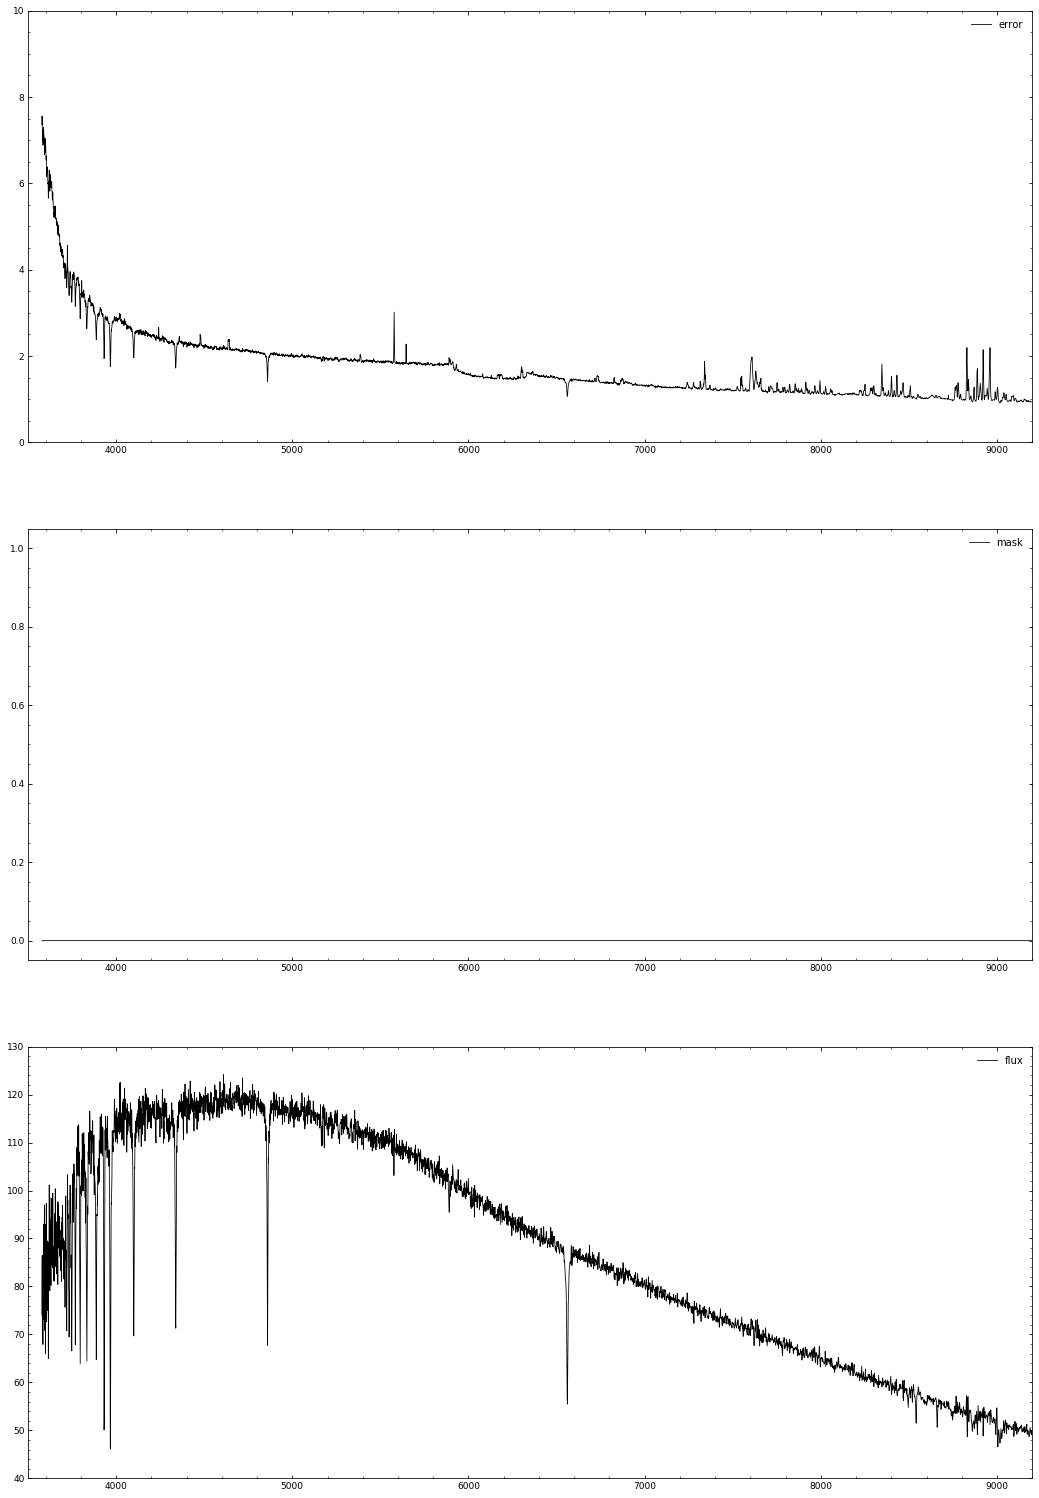

In [19]:
print np.mean(spec.ivar**0.5*spec.flux)
fig, ax = plt.subplots(figsize=[18,27],nrows=3, ncols=1)
ax[-1].plot(spec.wave, spec.flux, 'k-', lw=0.8, label='flux')
ax[-1].set_xlim(3500,9200)
ax[-1].set_ylim(40,130)
ax[1].plot(spec.wave, (spec.ivar*spec.flux)<1, 'k-', lw=0.8, label='mask')
ax[1].set_xlim(3500,9200)
#ax[1].set_ylim(0,140)
ax[0].plot(spec.wave, spec.err, 'k-', lw=0.8, label='error')
ax[0].set_xlim(3500,9200)
ax[0].set_ylim(0,10)
for i in ax:
    i.legend()

### op_hotstars: check rdspec for *MaStar spec*

In [139]:
spec = rdspec(op_hotstars)
print spec
print spec.flux, spec.flux.shape
print "sptype:",spec.sptype

<class loadspec.Spec1D at 0x7f66f04cb530>
BOSS MaStar Optical spectrum
File = /nfs/P100/SDSSV_Classifiers/data/optical/hotstars/mastar-3-100637315.fits
S/N =   54.78
Flux = [259.85974  259.85974  172.71399  ...  27.461758  27.461758  27.461758]
Err = [      nan 120.33117       nan ...       nan       nan       nan]
Wave = [ 3621.59598486  3622.42998417  3623.26417553 ... 10349.03843826
 10351.42166679 10353.80544415]
[259.85974  259.85974  172.71399  ...  27.461758  27.461758  27.461758] (4563,)
sptype: MaStar


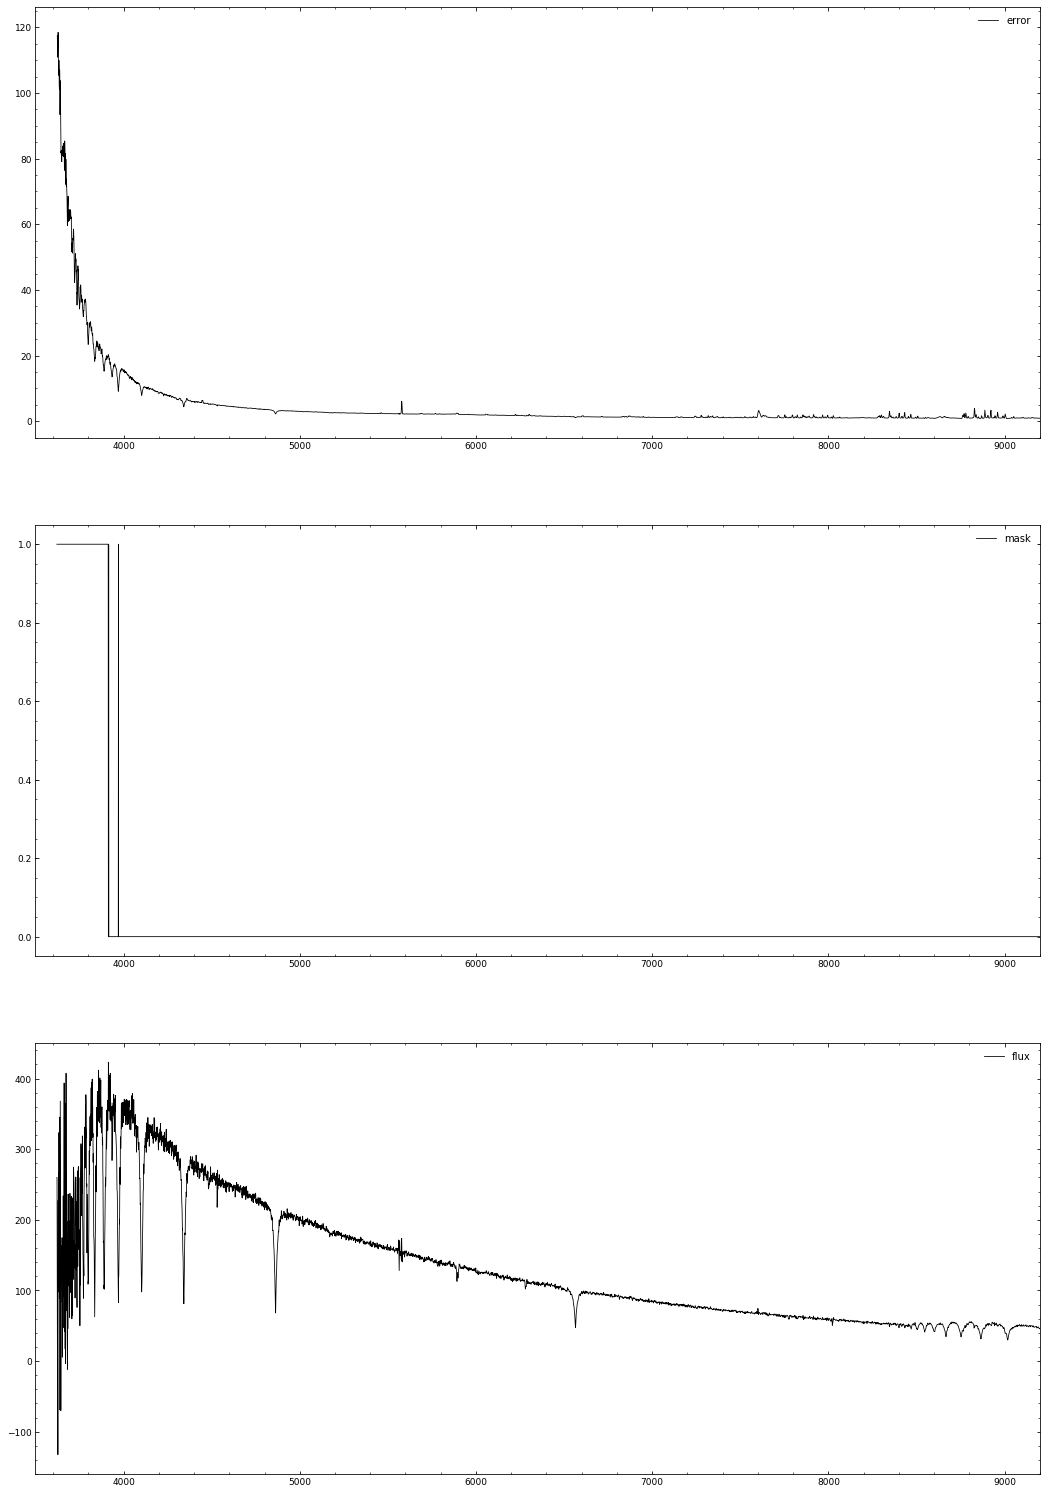

In [141]:
fig, ax = plt.subplots(figsize=[18,27],nrows=3, ncols=1)
ax[-1].plot(spec.wave, spec.flux, 'k-', lw=0.8, label='flux')
ax[-1].set_xlim(3500,9200)
#ax[-1].set_ylim(40,130)
ax[1].plot(spec.wave, (spec.ivar*spec.flux)<1, 'k-', lw=0.8, label='mask')
ax[1].set_xlim(3500,9200)
#ax[1].set_ylim(0,140)
ax[0].plot(spec.wave, spec.err, 'k-', lw=0.8, label='error')
ax[0].set_xlim(3500,9200)
#ax[0].set_ylim(0,10)
for i in ax:
    i.legend()

### op_wd: check rdspec for *BOSS spec*

In [131]:
spec = rdspec(op_wd)
print spec
print spec.flux, spec.flux.shape
print "sptype:",spec.sptype

<class loadspec.Spec1D at 0x7f66f04cb530>
BOSS spec Optical spectrum
File = /nfs/P100/SDSSV_Classifiers/data/optical/wd/SDSSJ000127.48+003759.1_55477-4216-0806.fits
S/N =   14.49
Flux = [18.87042   26.199354  24.963017  ... 89.39766   46.178513   2.9577727]
Err = [ 4.5909357  4.6839213  4.493683  ... 28.975689         nan 14.6008005]
Wave = [ 3591.6995  3592.526   3593.3542 ... 10396.809  10399.207  10401.593 ]
[18.87042   26.199354  24.963017  ... 89.39766   46.178513   2.9577727] (4619,)
sptype: spec


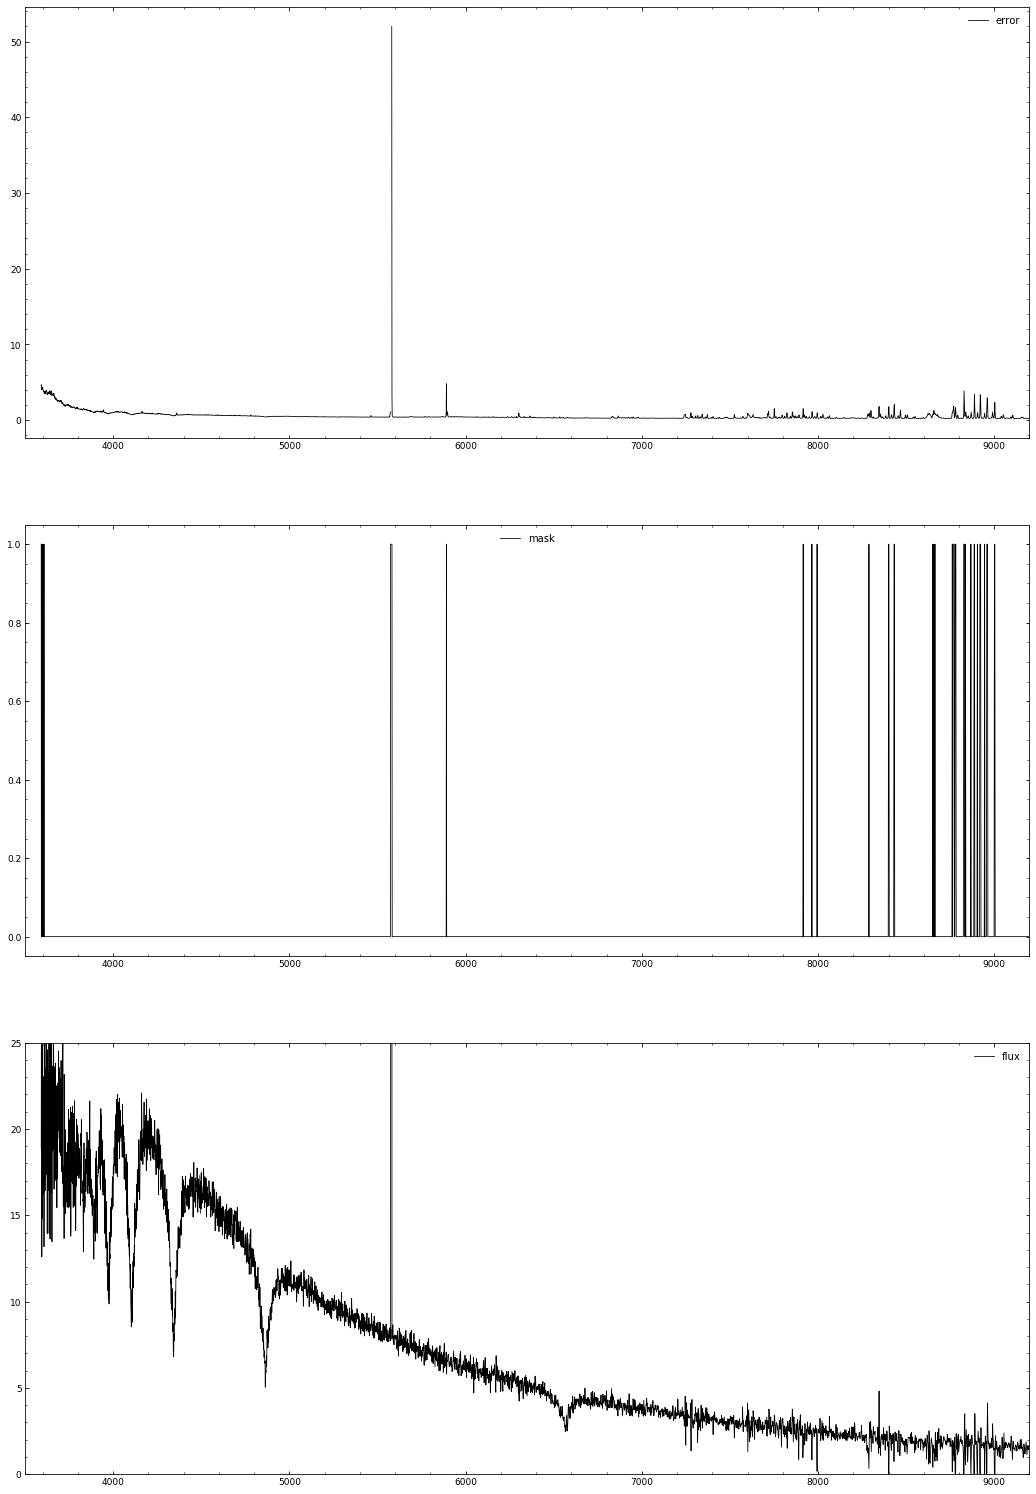

In [138]:
fig, ax = plt.subplots(figsize=[18,27],nrows=3, ncols=1)
ax[-1].plot(spec.wave, spec.flux, 'k-', lw=0.8, label='flux')
ax[-1].set_xlim(3500,9200)
ax[-1].set_ylim(0,25)
ax[1].plot(spec.wave, (spec.ivar*spec.flux)<1, 'k-', lw=0.8, label='mask')
ax[1].set_xlim(3500,9200)
#ax[1].set_ylim(0,140)
ax[0].plot(spec.wave, spec.err, 'k-', lw=0.8, label='error')
ax[0].set_xlim(3500,9200)
#ax[0].set_ylim(0,10)
for i in ax:
    i.legend()

![](check/wd/SDSSJ000127.48+003759.1_55477-4216-0806.gif)

### op_wdsb2: check rdspec for *BOSS spec*

In [146]:
spec = rdspec(op_wdsb2)
print spec
print spec.flux, spec.flux.shape
print "sptype:",spec.sptype

<class loadspec.Spec1D at 0x7f66f04cb530>
BOSS spec Optical spectrum
File = /nfs/P100/SDSSV_Classifiers/data/optical/wdsb2/SDSSJ011009.12+132616.0_56186-4664-0700.fits
S/N =   43.03
Flux = [223.63264   212.9666    212.3019    ...  34.477596   20.48554
   6.4926043]
Err = [16.020967  15.804008  15.949967  ... 10.132188         nan  3.8908083]
Wave = [ 3604.1255  3604.9565  3605.7856 ... 10384.842  10387.236  10389.631 ]
[223.63264   212.9666    212.3019    ...  34.477596   20.48554
   6.4926043] (4599,)
sptype: spec


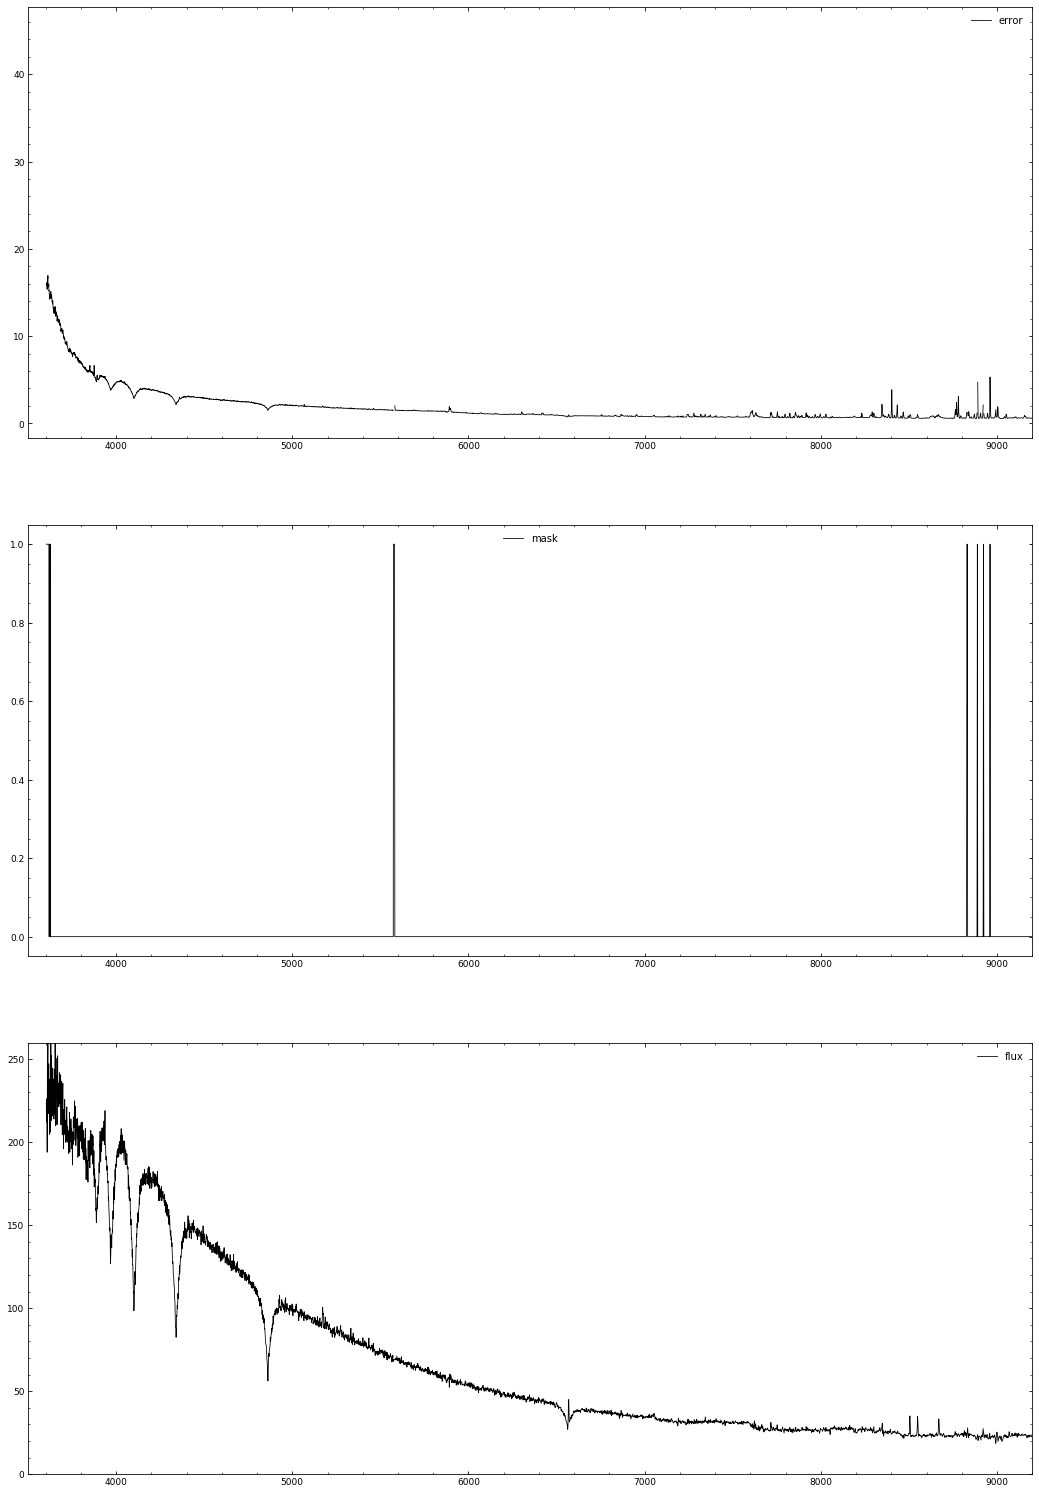

In [149]:
fig, ax = plt.subplots(figsize=[18,27],nrows=3, ncols=1)
ax[-1].plot(spec.wave, spec.flux, 'k-', lw=0.8, label='flux')
ax[-1].set_xlim(3500,9200)
ax[-1].set_ylim(0,260)
ax[1].plot(spec.wave, (spec.ivar*spec.flux)<1, 'k-', lw=0.8, label='mask')
ax[1].set_xlim(3500,9200)
#ax[1].set_ylim(0,140)
ax[0].plot(spec.wave, spec.err, 'k-', lw=0.8, label='error')
ax[0].set_xlim(3500,9200)
#ax[0].set_ylim(0,10)
for i in ax:
    i.legend()

![](check/wdsb2/SDSSJ011009.12+132616.0_56186-4664-0700.gif)

### op_yso: check rdspec for *BOSS spec*

In [150]:
spec = rdspec(op_yso)
print spec
print spec.flux, spec.flux.shape
print "sptype:",spec.sptype

<class loadspec.Spec1D at 0x7f66f04cb530>
BOSS spec Optical spectrum
File = /nfs/P100/SDSSV_Classifiers/data/optical/yso/spec-1249-54484-0606.fits
S/N =    2.58
Flux = [-2.0096436 -2.8558273 -1.1872818 ...  6.07906    7.6771026  5.6194487]
Err = [1.0728024  0.91528577 0.9733952  ... 0.7793347  0.8135854  0.85172725]
Wave = [3820.3215 3821.2024 3822.0815 ... 9206.613  9208.736  9210.8545]
[-2.0096436 -2.8558273 -1.1872818 ...  6.07906    7.6771026  5.6194487] (3823,)
sptype: spec


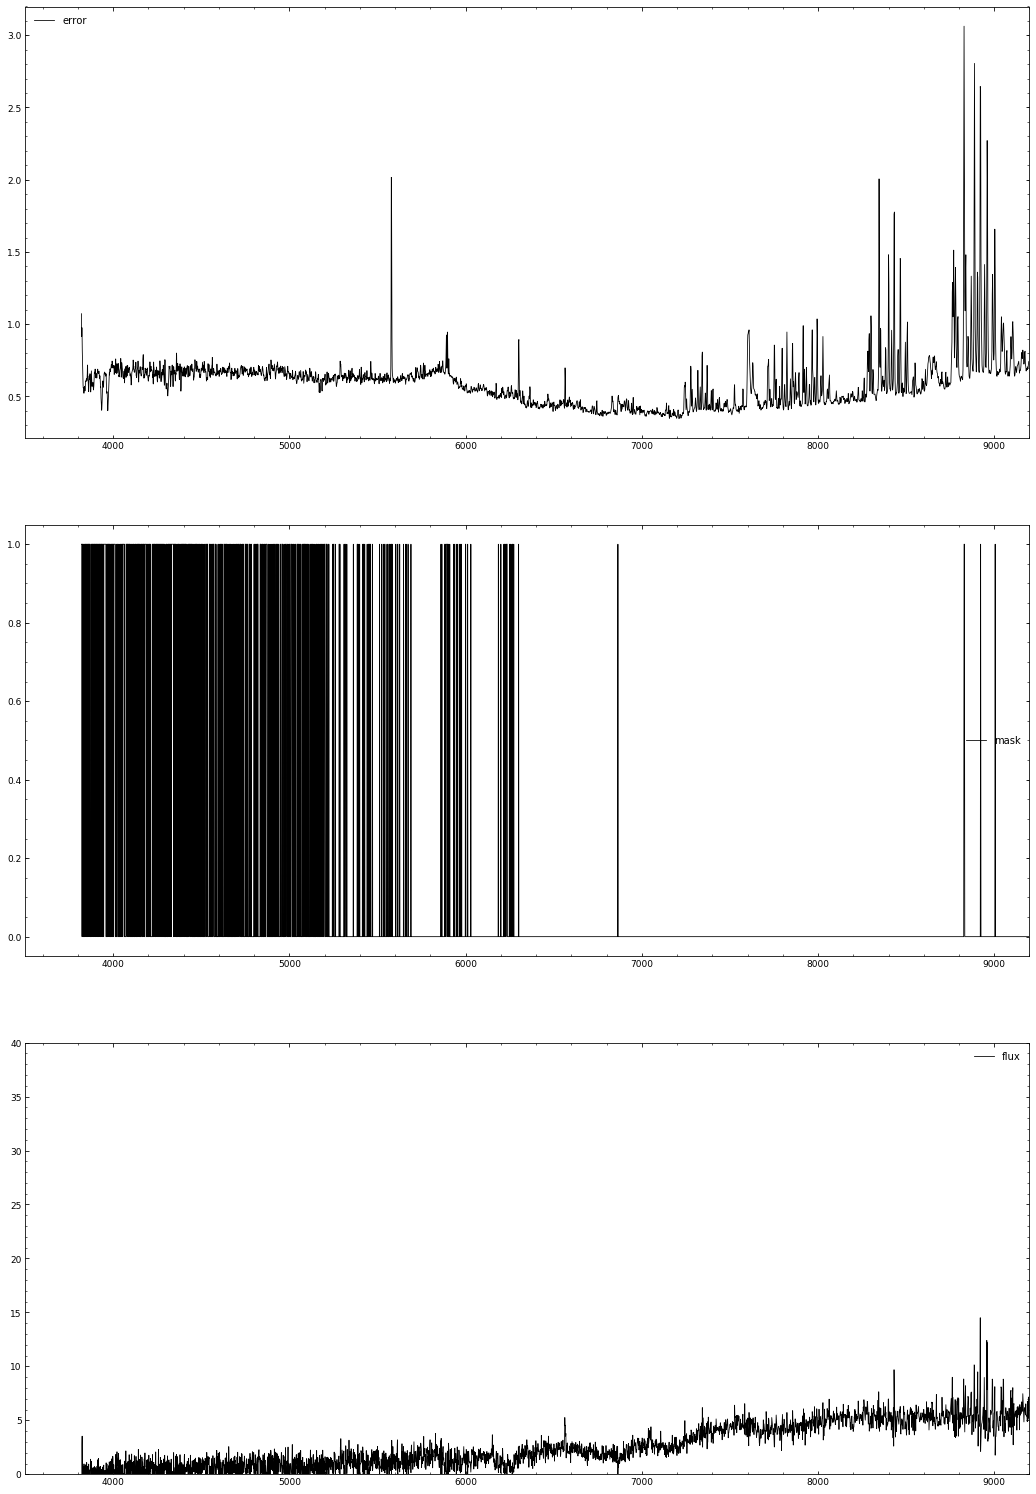

In [154]:
fig, ax = plt.subplots(figsize=[18,27],nrows=3, ncols=1)
ax[-1].plot(spec.wave, spec.flux, 'k-', lw=0.8, label='flux')
ax[-1].set_xlim(3500,9200)
ax[-1].set_ylim(0,40)
ax[1].plot(spec.wave, (spec.ivar*spec.flux)<1, 'k-', lw=0.8, label='mask')
ax[1].set_xlim(3500,9200)
#ax[1].set_ylim(0,140)
ax[0].plot(spec.wave, spec.err, 'k-', lw=0.8, label='error')
ax[0].set_xlim(3500,9200)
#ax[0].set_ylim(0,10)
for i in ax:
    i.legend()